<a href="https://colab.research.google.com/github/ngzhankang/finalYearProjectUOB/blob/main/NLP_MLP_Multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL YEAR PROJECT
Done by : 
- P1935785 Ang Yak Hng
- P1932964 Teo Swee Hong Winson
- P1935727 Ng Zhan Kang
- P1935488 Triston Loh
- P1935602 Ng Ao Yang

Class of DIT/FT/3A/05


---
---

# 1.Cloning Github To Colab Workspace

<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> The entire section 1 is dedicated to users who are using google colab to do the entire project. This entire process clones the private repository directly into the temporary google colab workspace. Google colab user are to repeat this same proccess whenever in a new session. Users who do not use colab to do this project CAN OMIT THE ENTIRE SECTION 1. 
</div>

### 1.1. Configurating SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:ZspmrdJA7vPoERsLNONcIRZV/ukm3jsqxAm3hBpJy1M root@ca7698c4e106
The key's randomart image is:
+---[RSA 4096]----+
|  +oo..          |
| o E o           |
|o.*.. .          |
|oBo++  . .       |
| o=Boo  S        |
|.  .B* *         |
|   o+o* +        |
|    =*.=.        |
|   .o==.oo       |
+----[SHA256]-----+


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> When prompted for a set of informations such as "Enter a file in which to save the key...", please press enter and DO NOT type in anything.
</div>

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-3fa83667


In [ ]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQC1wuqf4+DWiaDu1GYypdqhrv8ilPqdHvYGvPB+BpCy+YGOWu8EezJylrkbg4yyL9kGqkGKBIcH0QITzSSBYH7tuDGtV584bK9ZHuxeowJbkMFp5lgq06yVT47wGvcgOS7aOoX/eV3TbxC5RxKCNlvLjxYWFtyK26gGk83/gnBk9h/rHCqmNT28rbm5+3Q9HxzM4QQkdpU4/qBmI4dji8vyGNHGLY74z9hbyCh654nHcPuhK42GYTowmfOv9JP5ru/zGy6u28bO6GaHc7wMtgIi691LCiC76FulemTMfomAiW42zhNdi/abxouqYAXb1vu9OmoAU9AyayL0hlpEO1VhQ6WOfbSwQSAB2Jm+3Y3ZIhZvBxR1/tqXno3PBfTWnWN/W5w+wAGmeYYyU4ZOHDef9pr/Vv4ODe3dlR1kbSqVKMzXJDipkOsuS8HrOIAbfK3vkRaCkpRK23Y3mUmeOLXyDGOihbZ11mXToaoFfAyEJYCReyYxg8tSaq5Yu4Lr5++U52/GQLicYV06dmGcmJY4ZWiOvnm8eB+ZBksobFgtJdWAK5qFWrIdpYtNaekawGQAJ/5JWgfsg6mN3/kvmPNbLo6tHRbrFPTpkyJbunPJNiJOfA9RyvF0z5OqichAbU2asVmo7PnQGFRoCMMOjL7v0DH9OrKQaCcxwKea5kIMpw== root@ca7698c4e106


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> After the key has been generated, please copy the entire key. Navigate to your Github Account > Profile Picture > Settings > SSH and GPG keys > New SSH Keys. Paste the generated key into the blank and lable it for your own convenience.
</div>

### 1.2. Testing SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh -T git@github.com

Hi ngzhankang! You've successfully authenticated, but GitHub does not provide shell access.


### 1.3. Clone Private Repository

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!git clone git@github.com:ngzhankang/finalYearProjectUOB.git

Cloning into 'finalYearProjectUOB'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 145 (delta 46), reused 58 (delta 16), pack-reused 0
Receiving objects: 100% (145/145), 96.56 MiB | 9.40 MiB/s, done.
Resolving deltas: 100% (46/46), done.


---
---

# 2.Data Importing

### 2.1. Load the libraries

---

Load the necessary libraries for usage in the entire project.

In [1]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


### 2.2. Check CUDA Version

---

We need to check the cuda version to download the correct version of spaCy for this application.

In [2]:
# suppress future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# install necessary libraries that might not be found
!pip install tensorflow_addons
!pip install -U spacy
!python -m spacy validate
!pip install -U pip setuptools wheel
!pip install -U spacy[cuda110,transformers,lookups]
!python -m spacy download en_core_web_lg

# check versions of libraries we are going to use
%tensorflow_version 2.x
import os
import tensorflow
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import spacy
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Tensorflow version={}".format(tensorflow.__version__))
print("Keras version={}".format(tensorflow.keras.__version__))
print("Sklearn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("SpaCy version={}".format(spacy.__version__))
print("Python version={}".format(platform.python_version()))

     |████████████████████████████████| 679 kB 21.4 MB/s eta 0:00:01
2021-06-16 12:39:53.531967: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.0.6) =================
ℹ spaCy installation:
/home/yak/anaconda3/envs/uob_fyp/lib/python3.9/site-packages/spacy

NAME             SPACY            VERSION                            
en_core_web_lg   >=3.0.0,<3.1.0   3.0.0   ✔

     |████████████████████████████████| 1.5 MB 32.0 MB/s eta 0:00:01
     |████████████████████████████████| 821 kB 96.1 MB/s eta 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 52.0.0.post20210125
    Uninstalling setuptools-52.0.0.post20210125:
      Successfully uninstalled setuptools-52.0.0.post20210125
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uni

UsageError: Line magic function `%tensorflow_version` not found.


### 2.3. Load the modules

---

Load the necessary modules for usage in the entire project.

In [1]:
# importing necessary modules for this project
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import spacy

# activate the GPU to run spaCy with GPU
spacy.prefer_gpu()

%matplotlib inline

### 2.4. Load the dataset

---

Load the dataset for usage in the entire project.

In [2]:
# use pandas to read the excel file and populate it in a pandas dataframe
companies = pd.read_excel('./clean_dataset.xlsx')

# see the top 10 companies that are populated in the dataframe
companies.head(10)

,Company_ID,Company,Country,PIC,Sector,Subsector,Archetype,Valuechain,Websites,Company Profile Information,Remarks
0,4137190062363536,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,NaN,TMT,media,media_aggregator/distributor,Midstream,https://getlinks.co/6831,For over 80 years of experience in creating an...,NaN
1,23248790229909748,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://baike.baidu.com/item/%E4%B8%9C%E8%8E%9...,Yatai's main products cover various cleaning m...,NaN
2,28486505934571008,EXIS TECH SDN. BHD.,MALAYSIA,NaN,oos,others,others,NaN,http://www.exis-tech.com/,"In the beginning, it started off by providing ...",NaN
3,38251695094669872,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39910921263510776,Aztech Electronics Pte Ltd,SINGAPORE,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://www.aztech.com/business/about-us/,"Being a turnkey, one-stop integrated solutions...",NaN
5,54863889264716592,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,NaN,tmt,it_services,it_services,midstream,https://www.tongdun.net/info/company,Tongdun Technology is a professional third-par...,NaN
6,60624700618157752,EMASTIGA ENGRG PTE LTD,SINGAPORE,NaN,cni,cni_service providers,cni_service providers,midstream,http://emastiga.com/,"For over 30 years, EMASTIGA has been servicing...",Holding company and also provides it_services....
7,102285011598298000,"AEROFLUID CO.,LTD.",THAILAND,NaN,CNI,cni_equipment suppliers,cni_equipment suppliers,MIDSTREAM,https://www.matchlink.asia/business/page/Thail...,Sales of hydraulic equipment and parts,NaN
8,116707715618748400,POLYCOM ASIA PACIFIC PTE. LTD.,SINGAPORE,NaN,tmt,telecommunication,network equipment supplier,upstream,https://www.sgpbusiness.com/company/Polycom-As...,WHOLESALE OF TELECOMMUNICATIONS EQUIPMENT (EXC...,NaN
9,120313950904532592,EXCELKOS SDN. BHD.,MALAYSIA,NaN,IND,diversified,rubber,Manufacturer,https://www.excelkos.com/,"For Excelkos, it all started with a far-sighte...",NaN


---
---

# 3.Exploratory Data Analysis

### 3.1. Get overview of dataset

---

Get statistical information of the dataset to understand the dataset better.

In [3]:
# see the row headers of the entire pandas dataframe first
list(companies.columns)

['Company_ID',
 'Company',
 'Country',
 'PIC',
 'Sector',
 'Subsector',
 'Archetype',
 'Valuechain',
 'Websites',
 'Company Profile Information',
 'Remarks']

In [4]:
# get the total number of records in the dataframe
df_count = companies['Company_ID'].count()

# get count of unique contries where companies are based in
df_countCountry = companies['Country'].nunique()

# get count of total unique sectors where companies are from
df_countSector = companies['Sector'].nunique()

# get count of total unique subseector where companies are from
df_countsubSector = companies['Subsector'].nunique()

# get count of total unique valuechain where companies are from
df_countValuechain = companies['Valuechain'].nunique()

print('Total number of records:', df_count)
print('Total number of countries:', df_countCountry)
print('Total number of sectors:', df_countSector)
print('Total number of subsectors:', df_countsubSector)
print('Total number of valuechain:', df_countValuechain)

Total number of records: 5000
Total number of countries: 11
Total number of sectors: 14
Total number of subsectors: 35
Total number of valuechain: 20


In [5]:
# get total number of countries
df_totalCountries = companies['Country'].value_counts()

# get list of unique sector
df_sector = companies['Sector'].value_counts()

# get list of unique archetype
df_archetype = companies['Archetype'].value_counts()

# get list of unique valuechain
df_valuechain = companies['Valuechain'].value_counts()

print('List of unique countries:\n{}'.format(df_totalCountries))
print()
print('List of unique sector:\n{}'.format(df_sector))
print()
print('List of unique valuechain:\n{}'.format(df_valuechain))

List of unique countries:
SINGAPORE         1727
MALAYSIA          1226
THAILAND           998
CHINA              512
INDONESIA          271
HONG KONG          258
VIETNAM              4
AUSTRALIA            1
LABUAN               1
TAIWAN               1
UNITED KINGDOM       1
Name: Country, dtype: int64

List of unique sector:
CNI    880
OOS    877
CG     440
IND    428
REH    424
ONG    341
TMT    339
cni    291
tmt    257
oos     97
ong     97
ind     21
cg      15
reh      6
Name: Sector, dtype: int64

List of unique valuechain:
MIDSTREAM                 847
Downstream                632
midstream                 373
Midstream                 349
                          304
DOWNSTREAM                302
downstream                232
Manufacturer              127
UPSTREAM                  122
Upstream                   94
Trader                     88
Upstream or Downstream     82
distributor                81
Across value chain         60
upstream                   51
upstream o

In [6]:
# get list of unique subsector
df_subsector = companies['Subsector'].value_counts()

print('List of unique Subsector:\n{}'.format(df_subsector))

List of unique Subsector:
others                               974
building_material                    475
buildings & industrial               343
retail n distribution                303
consumer electronics                 235
auto & mec                           234
petrochemical                        218
metals and mining                    168
cni_service providers                156
residential                          146
it_services                          114
utilities                            108
restaurants, catering & services     106
o&g                                  106
semiconductor                         92
o&g_service providers/contractors     90
fmcg                                  90
telecommunication                     69
mixed                                 66
infrastructure                        59
media                                 57
commercial                            50
diversified                           46
hotels and accommodation       

In [7]:
print('List of unique archetype:\n{}'.format(df_archetype))

List of unique archetype:
others                                974
building_material_manufacturer        324
buildings & industrial_contractor     309
consumer discretionary distributor    191
consumer electronics_distributor      183
                                     ... 
MIDSTREAM                               1
hotels and accommodation_developer      1
tisp – fiber cable                      1
industrial gas                          1
building material_manufacturer          1
Name: Archetype, Length: 93, dtype: int64


### 3.2. Drop unncessary columns

---

Here, we will drop columns that wiill not aid in our EDA.

In [8]:
# declare the list of the row names that are redundant
rows_to_drop = ['Company_ID', 'PIC', 'Websites', 'Remarks']

# use a conditional expression to filter out those rows
df_filteredCompanies = companies.drop(labels=rows_to_drop, axis=1)

df_filteredCompanies

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
...,...,...,...,...,...,...,...
4995,SHENGYA (SG) PTE. LTD.,SINGAPORE,OOS,others,others,NaN,OTHER INFORMATION SERVICE ACTIVITIES N.E.C.
4996,"HUBEI HONG MAO SLAG POWDER CO., LTD.",CHINA,NaN,NaN,NaN,NaN,NaN
4997,ADAMPAK (THAILAND) LTD.,THAILAND,OOS,others,others,NaN,Known for our high quality products and dynami...
4998,HOE LEONG CRAWLER PARTS PTE. LTD.,SINGAPORE,OOS,others,others,NaN,WHOLESALE TRADE OF A VARIETY OF GOODS WITHOUT ...


### 3.3. Filter rows with valid data

---

Extract columns with Nan values and list them out here. Afterwards, gather the rows deemed suitable to process NLP.

In [9]:
# find all the rows with nan data in sector, subsector, archetype and valuechain
cols_to_check = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']
empty = df_filteredCompanies[df_filteredCompanies[cols_to_check].isnull().all(1)]

empty

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
13,"CHANGTU COUNTRY LONGXING FERTILIZER CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
35,"ZIBOBOSHANHONGLIWEI MOTOR CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
62,"BEIJING DUO MEIDUO SHIYOU PRODUCTS SALES CO., ...",CHINA,NaN,NaN,NaN,NaN,NaN
79,TRUSVEST SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4947,"D.T.CONCRETE (CHIANGRAI) CO.,LTD.",THAILAND,NaN,NaN,NaN,NaN,NaN
4948,ABR (HK) LIMITED,HONG KONG,NaN,NaN,NaN,NaN,NaN
4951,"YAKESHI CHENG NEW TYPE WALL MATERIAL CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
4955,"HUAI AN CITY ZHENG HE TRADE CO.,",CHINA,NaN,NaN,NaN,NaN,NaN


In [10]:
# now we get the dataset that are valid
df_valid = pd.concat([df_filteredCompanies, empty, empty]).drop_duplicates(keep=False)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,Tongdun Technology is a professional third-par...
...,...,...,...,...,...,...,...
4994,KARYA MANIS SDN BHD,MALAYSIA,REH,residential,residential_developer,UPSTREAM,PROPERTY DEVELOPMENT
4995,SHENGYA (SG) PTE. LTD.,SINGAPORE,OOS,others,others,NaN,OTHER INFORMATION SERVICE ACTIVITIES N.E.C.
4997,ADAMPAK (THAILAND) LTD.,THAILAND,OOS,others,others,NaN,Known for our high quality products and dynami...
4998,HOE LEONG CRAWLER PARTS PTE. LTD.,SINGAPORE,OOS,others,others,NaN,WHOLESALE TRADE OF A VARIETY OF GOODS WITHOUT ...


In [11]:
# now we check the count of the total filtered dataset again
df_filterCount = df_valid['Company'].count()

print('Total number of filtered records:', df_filterCount)

Total number of filtered records: 4519


### 3.4. Get graphical overview of dataset

---

Get visualised information of the dataset to understand the dataset better.

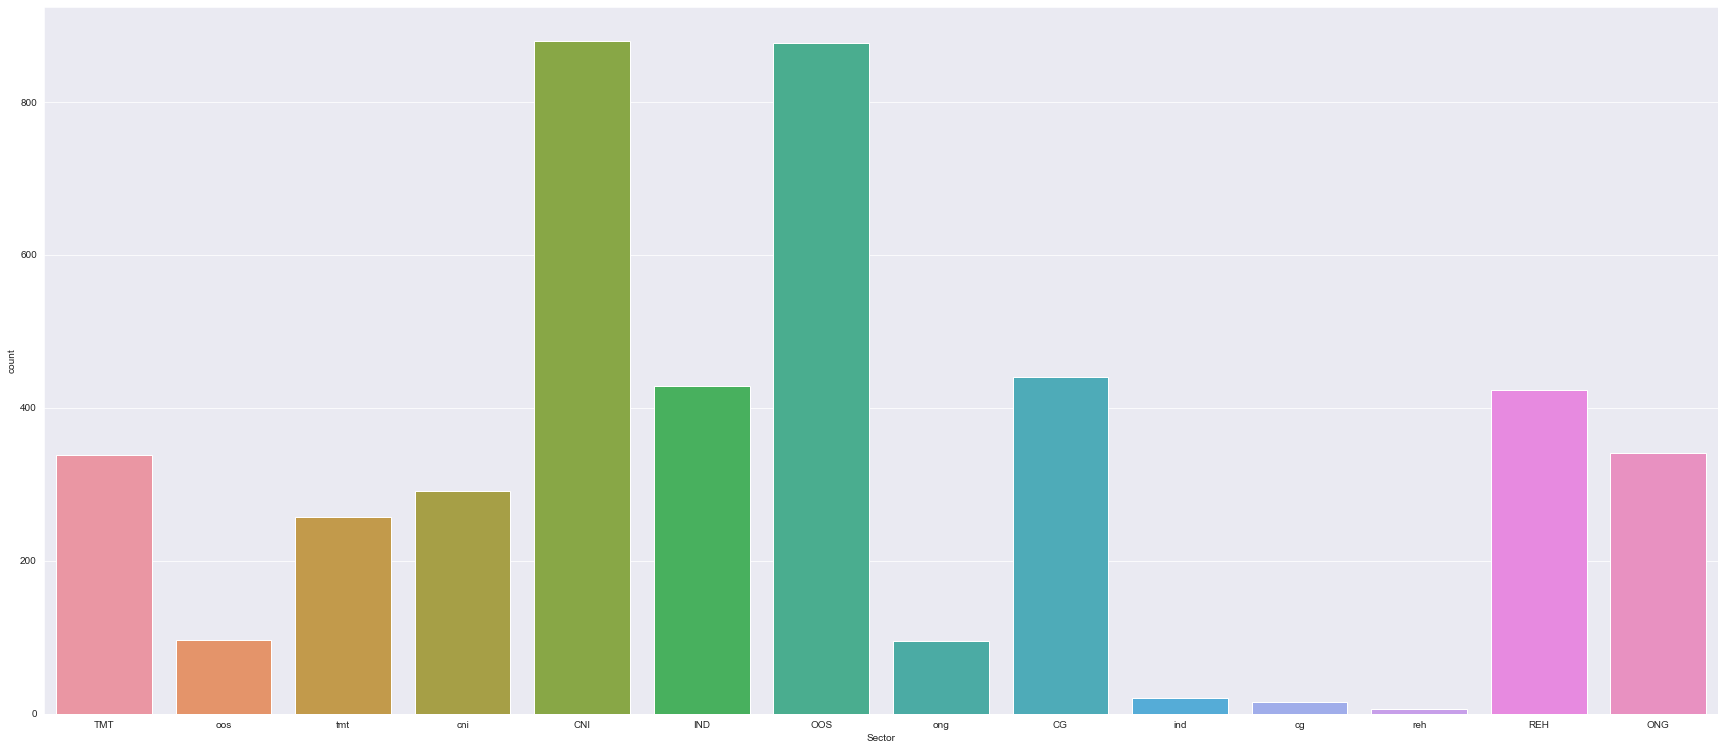

In [12]:
sns.set_style('darkgrid')
plt_dims = (30, 13)
fig, ax = plt.subplots(figsize=plt_dims)

# plot a barplot to see number of companies that belongs to specific sectors
sns.countplot(x="Sector", data=df_valid, ax=ax)
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies comes from the CNI(Construction And Infrastructure), with TMT(Technology, Media and Telecomm) sector.
</div>

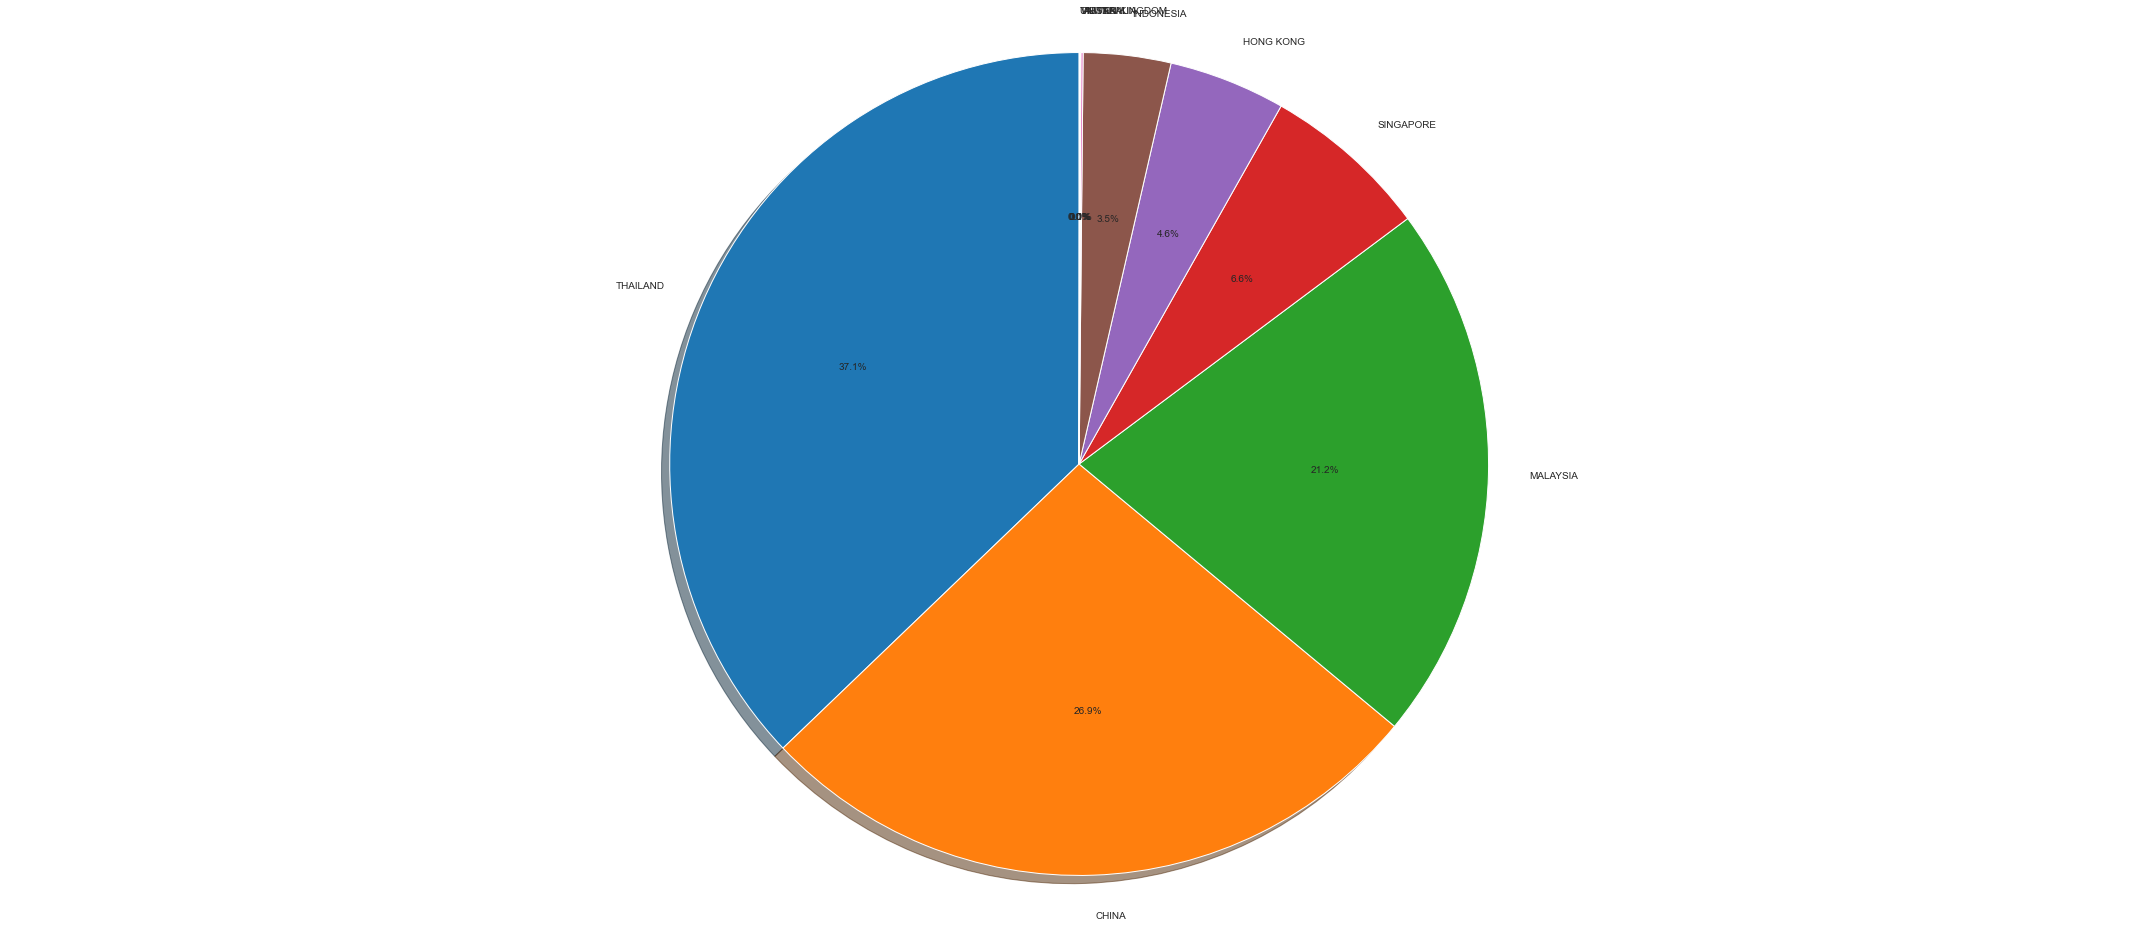

In [13]:
# Pie chart
labels = list(df_valid['Country'].unique())
sizes = list(df_valid['Country'].value_counts())

plt_dims = (30, 13)
fig1, ax1 = plt.subplots(figsize=plt_dims)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies are Singapre-Based companies, followed up by Hong Kong, Indonesia and so on.
</div>

### 3.5. See examples of company description

---

We would now like to see some examples of the company descriptions in order to undestand later how to preprocess them later on.

In [14]:
# configurate pandas dataframe to let us see the entire company description IN FULL
pd.set_option('display.max_colwidth', None)

# get the 1st 50 results and observe
df_valid.loc[0:10,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                        For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.
1                                                                                                                                                                                                                                                                                                                                    Yatai's main products cover various cleaning machinery, cleaning agents, cl

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We do realise that some of the company profile message have some breaks in between like '\n'. Now, we will have to take away all these problems so that it is one string of paragraph with no such annotations in betweeen.
</div>

---
---

# 4.Data Preprocessing

### 4.1. Removing `\n`

---

Now, we will like to standardize all the paragraphs such that the are homogenous, before we tokenize the paragraph.

In [15]:
# get rid of the \n found in the respective descriptions
df_valid = df_valid.replace('\n',' ', regex=True)

# now we validate to see if theye are really gone
df_valid.loc[0:10,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                        For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.
1                                                                                                                                                                                                                                                                                                                                     Yatai's main products cover various cleaning machinery, cleaning agents, c

### 4.2. Calculating the word length distribution

---

Here, we will be calculating the world length distribution of the collective company description.

In [16]:
# first, add in a new column that tabluates the length of the respecive company description
df_valid["length"] = df_valid["Company Profile Information"].str.len()
df_valid.head()

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0


/home/yak/anaconda3/envs/uob_fyp/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


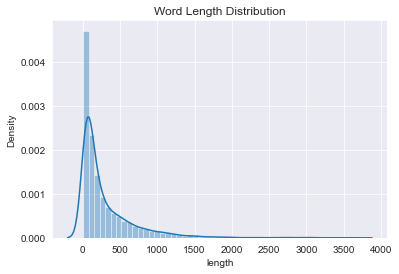

In [17]:
# now plot a distribution plot to see the word length distribution
sns.distplot(df_valid["length"], kde=True)
plt.title('Word Length Distribution')
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We can see that there is a high record of the company description having a total word length of around 200 to 300, while those aboce 800 is very rare.
</div>

### 4.3. Subsample from the entire dataset

---

We will now subsample a part of the dataset from the entire dataset. This is important as firstly, we need to ensure that our tokenization is working correctly in a smaller scale dataset, since using the entire dataset to do it will be very time consuming.

In [18]:
# declare sample size here first (CHANGE IT AS THE TRAINING DATA INCREASES)
sample_size = 350

# now we will get the data from the restricted range of sample size
subsample = df_valid[:sample_size]
subsample

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0
...,...,...,...,...,...,...,...,...
366,SHOPEE HONG KONG LIMITED,HONG KONG,tmt,digital_business,digital_business,midstream,"Shopee is the leading e-commerce platform in Southeast Asia and Taiwan. It is a platform tailored for the region, providing customers with an easy, secure and fast online shopping experience through strong payment and logistical support. Shopee aims to continually enhance its platform and become the region’s e-commerce destination of choice. Shopee has a wide selection of product categories ranging from consumer electronics to home & living, health & beauty, baby & toys, fashion and fitness equipment. Shopee, a Sea company, was first launched in Singapore in 2015, and has since expanded its reach to Malaysia, Thailand, Taiwan, Indonesia, Vietnam and the Philippines. Sea is a leader in digital entertainment, e-commerce and digital financial services across Greater Southeast Asia. Sea’s mission is to better the lives of consumers and small businesses with technology, and is listed on the NYSE under the symbol SE.",924.0
367,M-LINK SYSTEM (M) SDN. BHD.,MALAYSIA,tmt,consumer electronics,consumer electronics_distributor,downstream,"Formed in 1989, and with the rapid growth, the company has incorporated in 1994 as M-LINK SYSTEM (M) SDN BHD, with its headquarter in Petaling Jaya, Selangor and 7 branches located at strategic and important network points of Malaysia. M-Link System (M) Sdn Bhd has forged

### 4.4. Populating Nan cells

---

We will now have to populate Nan cells with space so that we can carry on and process with text tokenization.

In [19]:
# fill na with space instead of others
df_valid.fillna(" " ,inplace=True)
df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0
...,...,...,...,...,...,...,...,...
4994,KARYA MANIS SDN BHD,MALAYSIA,REH,residential,residential_developer,UPSTREAM,PROPERTY DEVELOPMENT,20.0
4995,SHENGYA (SG) PTE. LTD.,SINGAPORE,OOS,others,others,,OTHER INFORMATION SERVICE ACTIVITIES N.E.C.,43.0
4997,ADAMPAK (THAILAND) LTD.,THAILAND,OOS,others,others,,"Known for our high quality products and dynamic service, we are a leading tape and label converter delivering premium solutions to a range of clients right across the globe.",174.0
4998,HOE LEONG CRAWLER PARTS PTE. LTD.,SINGAPORE,OOS,others,others,,WHOLESALE TRADE OF A VARIETY OF GOODS WITHOUT A DOMINANT PRODUCT,64.0


### 4.5. Assigning tags
---
In this section, we will be assigning tags to every row, so that we can make use of the given keywords for bag-of-words (BoW) processing.

In [20]:
# Programmatically assign tags to each definition
sector_keywords = pd.read_excel('./sector_master_definition.xlsx')
df_keywords = sector_keywords[['Sector', 'Subsector', 'Archetype', 'Value Chain', 'Sector Keywords']]

# capitalise all tags
df_keywords['Value Chain'] = df_keywords['Value Chain'].str.upper()
df_keywords.fillna(' ', inplace=True)
df_keywords['Sector Keywords'] = df_keywords['Sector Keywords'].str.upper()
df_keywords['Sector Keywords'].replace(' ', '[]', inplace=True)

# save unique tags, sorted for consistency across runs
sector = np.sort(df_keywords['Sector'].unique())
subsector = np.sort(df_keywords['Subsector'].unique())
archetype = np.sort(df_keywords['Archetype'].unique())
valuechain = np.sort(df_keywords['Value Chain'].unique())

# save counts for use in model
print(len(sector), len(subsector), len(archetype), len(valuechain))
tag_counts = [len(sector), len(subsector), len(archetype), len(valuechain)]

# assign number tag list to each row
taglist = []
for index, row in df_keywords.iterrows():
    temp = []

    temp.append(np.where(sector == row['Sector'])[0][0])
    temp.append(np.where(subsector == row['Subsector'])[0][0])
    temp.append(np.where(archetype == row['Archetype'])[0][0])
    temp.append(np.where(valuechain == row['Value Chain'])[0][0])

    taglist.append(temp)

# assign completed taglist to column in dataframe
df_keywords['list_tag'] = taglist

7 32 92 9


/home/yak/anaconda3/envs/uob_fyp/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
<ipython-input-20-731544da05e3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keywords['Value Chain'] = df_keywords['Value Chain'].str.upper()
/home/yak/anaconda3/envs/uob_fyp/lib/python3.9/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-20-731544da05e3>:8: SettingWithCopyWarning: 
A value is t

In [21]:
# process data for homogenity
df_valid['Valuechain'] = df_valid['Valuechain'].str.split().str.join(' ')
df_valid['Valuechain'] = df_valid['Valuechain'].str.upper()
df_valid['Sector'] = df_valid['Sector'].str.upper()
df_valid['Valuechain'].replace('', ' ', inplace=True)

taglist_df = []
# process tags for records
for index, row in df_valid.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except:
        # drop data if not valid
        print(row, '\n')
        df_valid.drop(index, inplace=True)


df_valid['list_tag'] = taglist_df

df_valid.shape

Company                        TOP FOUNTAIN LIMITED
Country                                   HONG KONG
Sector                                             
Subsector                                          
Archetype                                          
Valuechain                                         
Company Profile Information                        
length                                             
Name: 1905, dtype: object 

Company                                                                                                                        NASA CONCRETE LIMITED PARTNERSHIP
Country                                                                                                                                                 THAILAND
Sector                                                                                                                                                       CNI
Subsector                                                                

(4502, 9)

In [22]:
# combine all keywords from all sectors
keywords_masterlist = []
for index, row in df_keywords.iterrows():
    keywords_masterlist += eval(row['Sector Keywords'])

# remove extraenous keywords, then sort
keywords_masterlist = sorted(list(set(keywords_masterlist)))
print(len(keywords_masterlist))

1474


### 4.6. Text Tokenization, Removing Stop Words, punctuations, numbers, stop words and Lower Case

---

Now we will start to tokenize the word after we have ensure that the text description between the company descriptions are homogenous. In this process, we will also process with stop words, punctuations, numeric figures, lower cap words and lemmatize words all using the spaCy API.

In [23]:
# we will have to ensure all the dtype of the respective columns are in string and not float for spacy to handle properly, so now we will attempt to convert all into strings
columns_to_convert = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']

for i in columns_to_convert:
  df_valid[i] = df_valid[i].astype(str)

Here we will do everything necessary to start up spacy for use in preprocessing the text.

In [24]:
# import required libraries 
from spacy.language import Language
from spacy.tokens import Doc
from spacy.lang.char_classes import ALPHA, ALPHA_LOWER, ALPHA_UPPER, CONCAT_QUOTES, LIST_ELLIPSES, LIST_ICONS
from spacy.util import compile_infix_regex

# initialise nlp engine
nlp = spacy.load("en_core_web_lg")

# declare custom properties
Doc.set_extension('processed', default=True, force=True)

# Modify tokenizer infix patterns
infixes = (
    LIST_ELLIPSES
    + LIST_ICONS
    + [
        r"(?<=[0-9])[+\-\*^](?=[0-9-])",
        r"(?<=[{al}{q}])\.(?=[{au}{q}])".format(
            al=ALPHA_LOWER, au=ALPHA_UPPER, q=CONCAT_QUOTES
        ),
        r"(?<=[{a}]),(?=[{a}])".format(a=ALPHA),
        r"(?<=[{a}0-9])[:<>=/](?=[{a}])".format(a=ALPHA),
    ]
)

infix_re = compile_infix_regex(infixes)
nlp.tokenizer.infix_finditer = infix_re.finditer

# custom retokenizer
@Language.component('custom_retokenizer')
def custom_retoken(doc):
    doc_text = doc.text.upper()
    doc_split = [i.text.upper() for i in doc]
    temp_kw = [i.lstrip().rstrip() for i in keywords_masterlist if len(i.lstrip().rstrip().split(' ')) > 1]
    for token in temp_kw:
        token_length = len(token.split(' '))
        token_split = token.split(' ')
        if token in doc_text and token_split[0] in doc_split:
            merge_pos = doc_split.index(token_split[0])
            with doc.retokenize() as retokenizer:
                try:
                    retokenizer.merge(doc[merge_pos:merge_pos + token_length], attrs={'LEMMA' : token.lower()})
                except:
                    print(merge_pos, merge_pos+token_length)

    return doc

# custom lemmatizer
@Language.component("custom_preprocess")
def custom_preprocess(doc):
    temp = []
    # filter through each token and add to preprocessed text if requirements #
    # met.                                                                   #
    for t in doc:
        if (not t.is_punct and not t.like_num and not t.is_stop and not t.is_digit and not (t.ent_type == 396 or t.ent_type == 397)):
            temp.append(t.lemma_.upper())

    doc._.processed = temp

    return doc

# add custom pipeline components to default pipeline
nlp.add_pipe('custom_retokenizer')
nlp.add_pipe('custom_preprocess', last=True)

<function __main__.custom_preprocess(doc)>

In [25]:
# run the pipeline on data
processed_doc = list(nlp.pipe(df_valid['Company Profile Information']))

3 5
95 97
3 5


In [26]:
# print information on given company
print(f'Text\t\t\tEntity Type\tPart-of-Speech\tSentiment\t')

for token in processed_doc[4]:
    print(f'{token.text: <24}{token.ent_type_: <16}{token.pos_: <16}{token.sentiment: <16}')

Text			Entity Type	Part-of-Speech	Sentiment	
Tongdun                 ORG             PROPN           0.0             
Technology              ORG             PROPN           0.0             
is                                      AUX             0.0             
a                                       DET             0.0             
professional                            ADJ             0.0             
third-party                             ADJ             0.0             
intelligent                             ADJ             0.0             
risk                                    NOUN            0.0             
management                              NOUN            0.0             
and                                     CCONJ           0.0             
decision-making                         NOUN            0.0             
service                                 NOUN            0.0             
provider                                NOUN            0.0             
headqu

In [27]:
# add lemmatised words to dataframe
df_valid['processed'] = [doc._.processed for doc in processed_doc]

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0,"[6, 18, 49, 5]","[YEAR, EXPERIENCE, CREATE, DEVELOP, HIGH-QUALITY, LEARNING, MATERIAL, ENABLE, PROVIDE, WORLD-CLASS, EDUCATIONAL, INNOVATION, MEET, NEED, TEACHER, STUDENT, INSTITUTION, EDUCATIONAL, AUTHORITY]"
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0,"[6, 8, 20, 3]","[YATAI, MAIN, PRODUCT, COVER, CLEANING, MACHINERY, CLEAN, AGENT, CLEANING, TOOL, STONE, MAINTENANCE, CLEANING, PRODUCT, CLEAN, SOLUTION, SERVICE, INCLUDE, PRODUCT, TECHNICAL, CONSULTATION, PRODUCT, CUSTOMIZATION, EMPLOYEE, TRAINING, MAINTENANCE]"
2,EXIS TECH SDN. BHD.,MALAYSIA,OOS,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0,"[4, 24, 64, 0]","[BEGINNING, START, PROVIDE, TECHNICAL, SUPPORT, TEST, HANDLER, MOVE, MODULE, DESIGN, PRODUCTION, IN-HOUSE, DESIGN, FULL-FLEDGED, HANDLER, INTRODUCE, COMPANY, DESIGN, PRODUCE, WIDE, RANGE, TURRET, PICK-AND-PLACE, SOLUTION, CUSTOMER, WORLD]"
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0,"[6, 8, 20, 3]","[TURNKEY, ONE-STOP, INTEGRATED, SOLUTION, PROVIDER, BASE, SINGAPORE, AZTECH, EQUIP, STATE-OF-THE-ART, EQUIPMENT, R&D, DESIGN, MANUFACTURING, PACKAGING, CAPABILITY, DELIVER, SEAMLESS, UNIFIED, EXPERIENCE, TIME, STRIVE, EDGE, TECHNOLOGY, YEAR, BUILD, CAPABILITY, SERVE, CLIENT, MANUFACTURING, NEED, INCLUDE, CONSUMER ELECTRONICS, TELECOMMUNICATION, HEALTHTECH, LED, LIGHTING, AUTOMOTIVE, TECHNOLOGY, START-UP, MARKET, SEGMENT]"
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,TMT,it_services,it_services,MIDSTREAM,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0,"[6, 17, 46, 5]","[TONGDUN, TECHNOLOGY, PROFESSIONAL, THIRD-PARTY, INTELLIGENT, RISK, MANAGEMENT, DECISION-MAKING, SERVICE, PROVIDER, HEADQUARTER, HANGZHOU, ZHEJIANG, INTEGRATE, ARTIFICIAL INTELLIGENCE, BUSINESS, SCENARIO, TONGDUN, TECHNOLOGY, OFF

### 4.7. Bag of Words / TF-IDF

In [54]:
# do bag of words, normalized
bow_vectors = []
max_count = 1

for index, row in df_valid.iterrows():
    company = row['processed']

    dictionary = dict.fromkeys(keywords_masterlist, 0)
    for word in company:
        if word in keywords_masterlist:
            dictionary[word] += 1
            
    temp_bow_vector = list(dictionary.values())
    if max(temp_bow_vector) > max_count:
        max_count = max(temp_bow_vector)

    # append to dataframe
    bow_vectors.append(temp_bow_vector)

    # print(f'{sum(dictionary.values()):>3}/{len(dictionary.values()):<3} |', dictionary.values())
    
# # normalize all vectors
# for i, vector in enumerate(bow_vectors):
#     bow_vectors[i] = list(np.array(vector) / max_count)
    
df_valid['BoW_vectors'] = bow_vectors

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed,BoW_vectors
3922,"ALUSITE PRECISION CO.,LTD.",THAILAND,IND,metals and mining,steel distributor,DISTRIBUTOR,"Founded in 2000, the company has grown to a workforce of 200, occupying 4000m2 of factory space and exporting to 20 countries around the world. Today, we continue to work with a dedicated team of sales, production and technical personnel to provide one-stop solutions for industry clients and end-users around the world. Alusite's team of engineers, technicians and machinists are able to design, prototype and mass produce aluminium extruded components to meet a variety of needs. Our experience and engineering expertise, combined with our dedication to quality and efficiency at fabrication stages, make us the outstanding manufacturer and supplier of precision machined components. We pride ourselves on hard work, honesty and diligent customer service. Social and environmental responsibility are also at the core of our company values- we support various orphanages around Thailand and provide scholarships to our employees' immediate families.",954.0,"[2, 19, 81, 2]","[FOUND, COMPANY, GROW, WORKFORCE, OCCUPY, 4000M2, FACTORY, SPACE, EXPORT, COUNTRY, WORLD, , TODAY, CONTINUE, WORK, DEDICATED, TEAM, SALE, PRODUCTION, TECHNICAL, PERSONNEL, PROVIDE, ONE-STOP, SOLUTION, INDUSTRY, CLIENT, END-USER, WORLD, ALUSITE, TEAM, ENGINEER, TECHNICIAN, MACHINIST, ABLE, DESIGN, PROTOTYPE, MASS, PRODUCE, ALUMINIUM, EXTRUDE, COMPONENT, MEET, VARIETY, NEED, EXPERIENCE, ENGINEERING, EXPERTISE, COMBINE, DEDICATION, QUALITY, EFFICIENCY, FABRICATION, STAGE, OUTSTANDING, MANUFACTURER, SUPPLIER, PRECISION, MACHINE, COMPONENT, , PRIDE, HARD, WORK, HONESTY, DILIGENT, CUSTOMER, SERVICE, SOCIAL, ENVIRONMENTAL, RESPONSIBILITY, CORE, COMPANY, VALUES-, SUPPORT, ORPHANAGE, THAILAND, PROVIDE, SCHOLARSHIP, EMPLOYEE, IMMEDIATE, FAMILY, ]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
3697,SAPPHIRE CITY INVESTMENTS LIMITED,SINGAPORE,OOS,others,others,,"Sapphire Corporation Limited (""Sapphire"" or the ""Group"") is an investment management and holding company with a business model aligned towards urbanisation trends. Particularly, the Group has businesses that are principally engaged in the engineering, procurement and construction (""EPC"") business related to the land transport infrastructure and water conservancy and environmental projects in China. Sapphire is incorporated in Singapore and has been listed on the Mainboard of the Singapore Exchange since 1999. The Group owns a 48.82% effective interest in China-based EPC business Ranken Holding Co., Limited (""Ranken"") and its subsidiaries. Founded in 1998, Ranken is incorporated in Hong Kong and based in Chengdu. It is a full-fledged EPC firm and one of the largest privately owned integrated urban rail transport infrastructure groups in China. Ranken holds full Triple-A qualifications and licences for design, supervision, construction and project consultation in the urban rail sector. Ranken’s expertise includes civil engineering works for metro lines, urban rail transit, expressways, roads and bridges as well as water conservancy and environmental projects. Its track record includes major infrastructure projects in China and South Asia. In 2019, Ranken was awarded a certification from the Science and Technology Bureau of Sichuan Province for its achievement in “Intelligent Project Management Cloud Platform for BIM Technology” and a business award from Chengdu Wuhou Business Association.",1516.0,"[4, 24, 64, 0]","[SAPPHIRE, CORPORATION, LIMITED, SAPPHIRE, GROUP, INVESTMENT, MANAGEMENT, HOLD, COMPANY, BUSINESS, MODEL, ALIGN, URBANISATION, TREND, PA

In [55]:
# clean up BoW data 
temp = 0
for index, row in df_valid.iterrows():
    if sum(row['BoW_vectors']) <= 0:
        df_valid.drop(index, inplace=True)

df_valid.shape

(3527, 11)

# 5.Models
---
Here we will train the model that will help categorize each company.

### 5.1. Training Models

In [35]:
import tensorflow.keras as Keras

print('--- Version Checking ---')
print("Keras:", Keras.__version__)

--- Version Checking ---
Keras: 2.5.0


In [56]:
# split datasets to train and test
distribution = int(df_valid.shape[0] * 0.9)

# randomise dataset
df_valid = df_valid.sample(frac=1)

df_train = df_valid.iloc[:distribution]
df_test = df_valid.iloc[distribution:]

df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

X_train = np.array(list(df_train['BoW_vectors']))
y_train = np.array(list(df_train['list_tag']))

X_test = np.array(list(df_test['BoW_vectors']))
y_test = np.array(list(df_test['list_tag']))

/home/yak/anaconda3/envs/uob_fyp/lib/python3.9/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [57]:
# create multi-output model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import Model

# function to build model branches
def multi_branch(x, name, input_dim, output_dim, dropout_rate):
    x = Dense(input_dim // 2, activation='selu')(x)
    x = Dropout(dropout_rate)(x)

    if name == 'sector' or name == 'subsector' or name == 'archetype':
        x = Dense(input_dim // 3, activation='selu')(x)
        x = Dropout(dropout_rate)(x)

    x = Dense(input_dim // 4, activation='tanh')(x)
    x = Dropout(dropout_rate)(x)

    if name == 'sector' or name == 'subsector' or name == 'archetype':
        x = Dense(input_dim // 4, activation='tanh')(x)
        x = Dropout(dropout_rate)(x)
    
    x = Dense(input_dim // 8, activation='tanh')(x)

    # output
    output = Dense(output_dim, name=name, activation='softmax')(x)

    return output

def create_multilabel(labels, labels_output_dim, input_dim, dropout_rate=0.3):
    # check labels
    assert len(labels) == len(labels_output_dim)

    input_layer = Input(input_dim)

    # group 1 dense layers
    group_1 = Dense(int(input_dim * 1.5), activation='swish')(input_layer)
    group_1 = Dropout(dropout_rate)(group_1)
    group_1 = Dense(input_dim // 1.5, activation='swish')(group_1)
    group_1 = Dropout(dropout_rate)(group_1)

    # multilabel branches
    branches = []
    for i in range(len(labels)):
        branches.append(multi_branch(group_1, labels[i], input_dim, labels_output_dim[i], dropout_rate))

    # put model together
    model = Model(inputs=input_layer, outputs=branches, name='company_classification_model')

    return model

# one hot 
def one_hot(arr, n_cat):
    output = []
    for n in arr:
        result = np.zeros(n_cat)
        result[n] = 1

        output.append(result)

    return np.array(output, dtype=int)

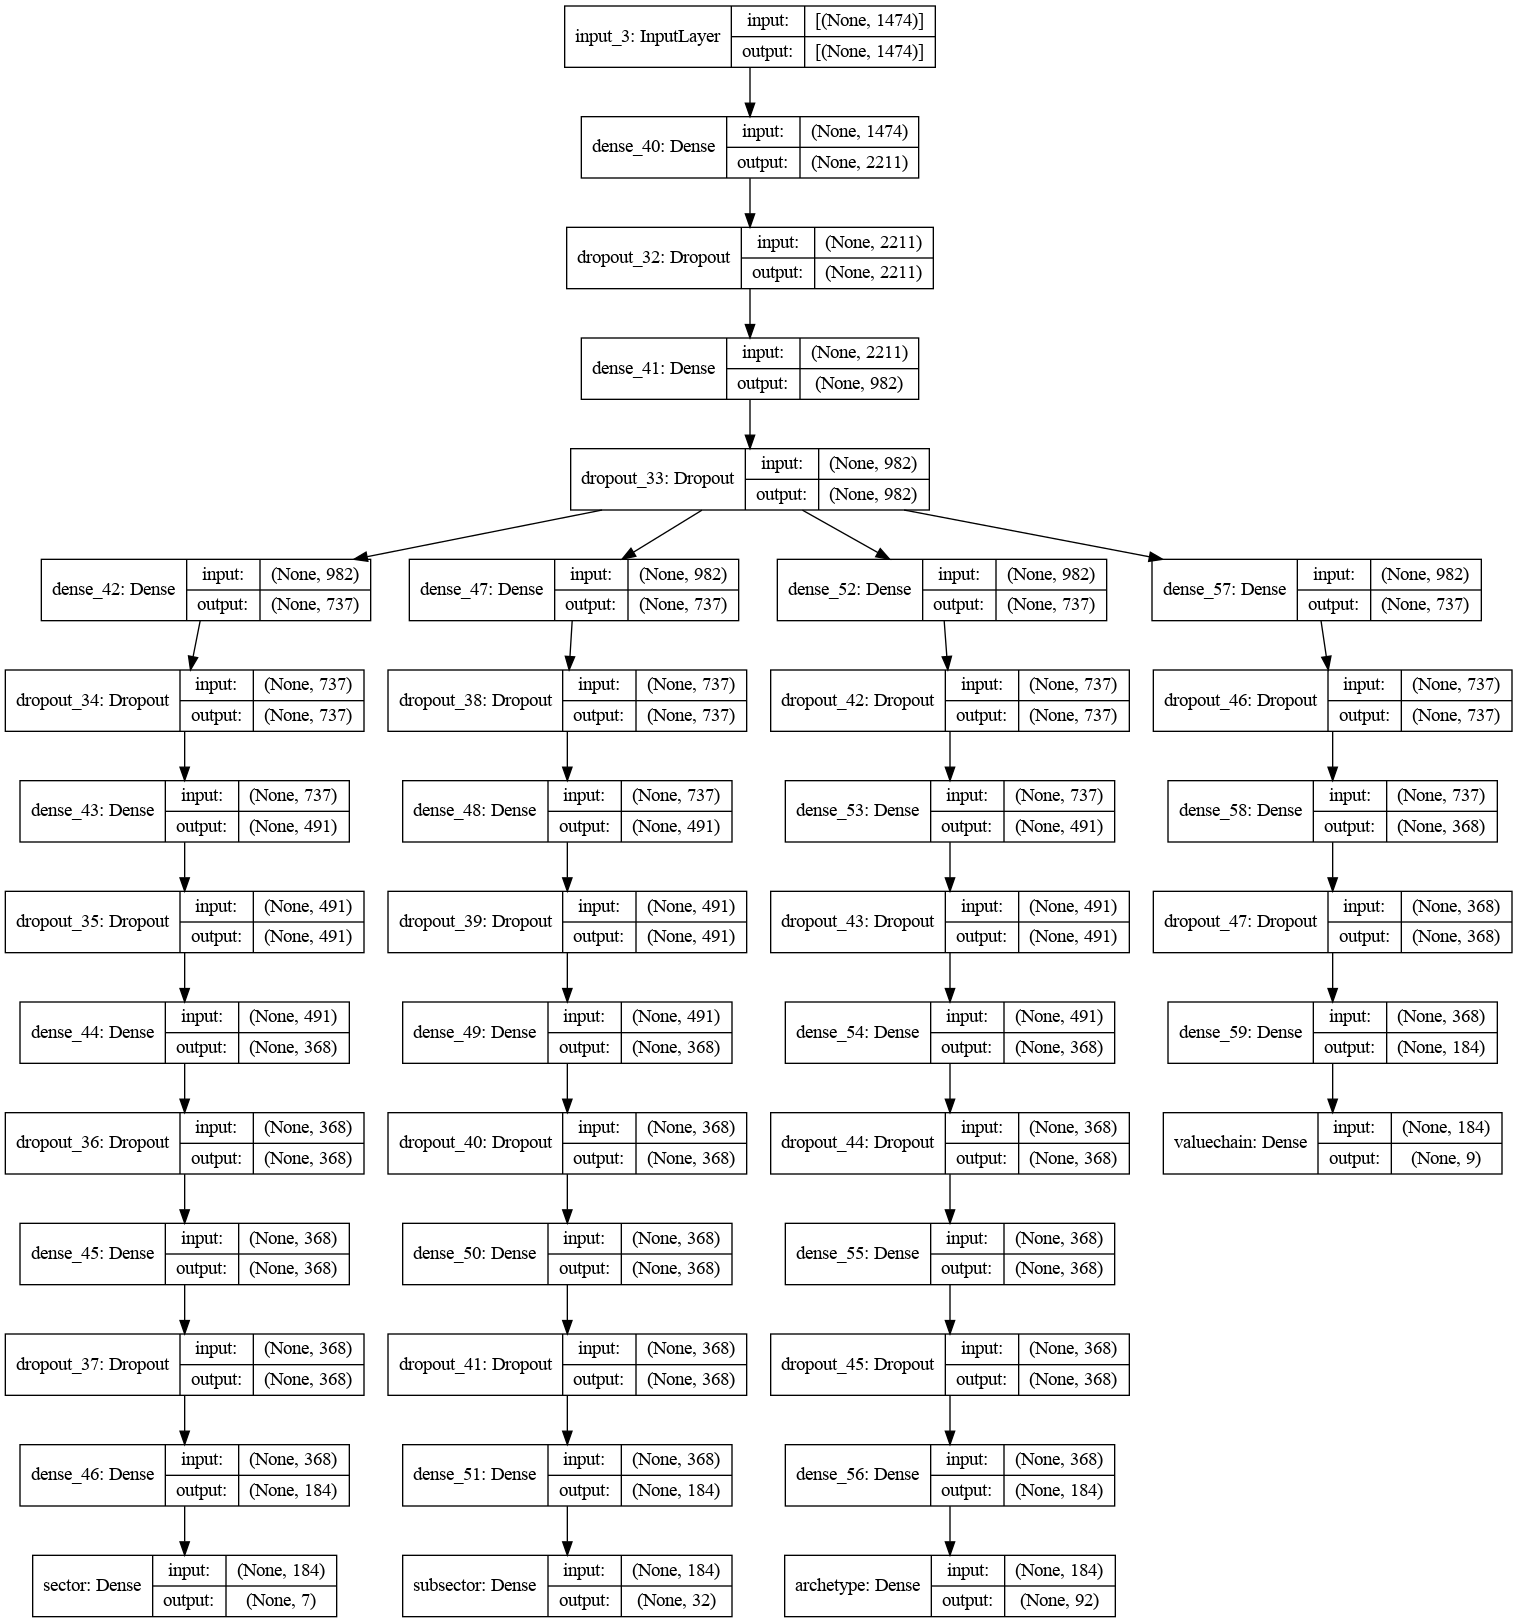

In [58]:
label_names = ['sector', 'subsector', 'archetype', 'valuechain']

model = create_multilabel(label_names, tag_counts, len(keywords_masterlist))

tf.keras.utils.plot_model(model, show_shapes=True)

In [59]:
# preprocess labels before training
y_train_multi = {label_names[0] : one_hot(y_train[:,0], tag_counts[0]),
                 label_names[1] : one_hot(y_train[:,1], tag_counts[1]),
                 label_names[2] : one_hot(y_train[:,2], tag_counts[2]),
                 label_names[3] : one_hot(y_train[:,3], tag_counts[3]),
                 }
y_test_multi = {label_names[0] : one_hot(y_test[:,0], tag_counts[0]),
                label_names[1] : one_hot(y_test[:,1], tag_counts[1]),
                label_names[2] : one_hot(y_test[:,2], tag_counts[2]),
                label_names[3] : one_hot(y_test[:,3], tag_counts[3]),
                }

losses = {i : 'categorical_crossentropy' for i in label_names}

In [60]:
# import metrics
from tensorflow.keras.metrics import Precision, Recall, AUC

model.compile(optimizer='adam', loss=losses, metrics=['accuracy', Precision(), Recall(), AUC(name='auc_precision_recall', num_thresholds=10000)])
history = model.fit(X_train, y_train_multi, epochs=50, batch_size=20)

Epoch 1/50
159/159 [==============================] - 5s 13ms/step - loss: 7.9426 - sector_loss: 1.2681 - subsector_loss: 2.2066 - archetype_loss: 3.0407 - valuechain_loss: 1.4272 - sector_accuracy: 0.5996 - sector_precision_2: 0.7043 - sector_recall_2: 0.4968 - sector_auc_precision_recall: 0.8657 - subsector_accuracy: 0.4033 - subsector_precision_2: 0.6207 - subsector_recall_2: 0.2171 - subsector_auc_precision_recall: 0.8879 - archetype_accuracy: 0.2965 - archetype_precision_2: 0.5640 - archetype_recall_2: 0.1055 - archetype_auc_precision_recall: 0.8847 - valuechain_accuracy: 0.4861 - valuechain_precision_2: 0.6091 - valuechain_recall_2: 0.3122 - valuechain_auc_precision_recall: 0.8731
Epoch 2/50
159/159 [==============================] - 2s 13ms/step - loss: 6.0850 - sector_loss: 0.9236 - subsector_loss: 1.6743 - archetype_loss: 2.3226 - valuechain_loss: 1.1646 - sector_accuracy: 0.7095 - sector_precision_2: 0.7530 - sector_recall_2: 0.6597 - sector_auc_precision_recall: 0.9254 - sub

### 5.2 Testing Models

In [61]:
metrics = model.evaluate(X_test, y_test_multi, verbose=0)[1:]

print(f'Label\t\tLoss\tAccuracy\tPrecision\tRecall\tPR AUC\tF1 Score')
for i, label in enumerate(label_names):
    print(f'{label:<16}{metrics[i]:<8.3f}{metrics[i+4]:<8.3%}\t{metrics[i+8]:<9.3f}\t{metrics[i+12]:<6.3f}\t{metrics[i+16]:<6.3f}\t{(metrics[i+8] * metrics[i+12]) / (metrics[i+8] + metrics[i+12]):<8.3f}')

Label		Loss	Accuracy	Precision	Recall	PR AUC	F1 Score
sector          1.199   68.555% 	0.518    	0.411 	0.541 	0.229   
subsector       1.990   68.847% 	0.603    	0.541 	0.558 	0.285   
archetype       2.603   62.606% 	0.431    	0.297 	0.507 	0.176   
valuechain      1.598   89.984% 	0.930    	0.933 	0.895 	0.466   


In [62]:
unique, counts = np.unique(y_test[:, 3], return_counts=True)
sum_counts = sum(counts)

print(f'Label\t\t\tCount\tPercent')
for i, label in enumerate(unique):
    print(f'{valuechain[label]:<24}{counts[i]:>5}\t{counts[i] / sum_counts:>7.2%}')

Label			Count	Percent
                           74	 20.96%
ACROSS VALUE CHAIN          6	  1.70%
DISTRIBUTOR                 6	  1.70%
DOWNSTREAM                 83	 23.51%
MANUFACTURER               12	  3.40%
MIDSTREAM                 130	 36.83%
TRADER                      4	  1.13%
UPSTREAM                   33	  9.35%
UPSTREAM OR DOWNSTREAM      5	  1.42%


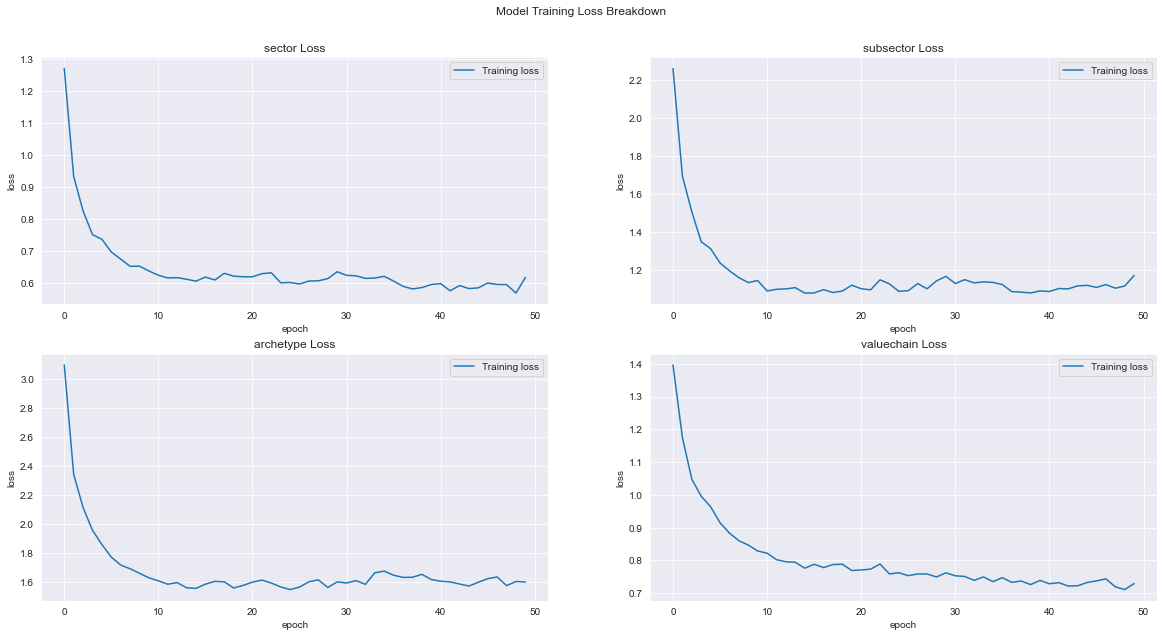

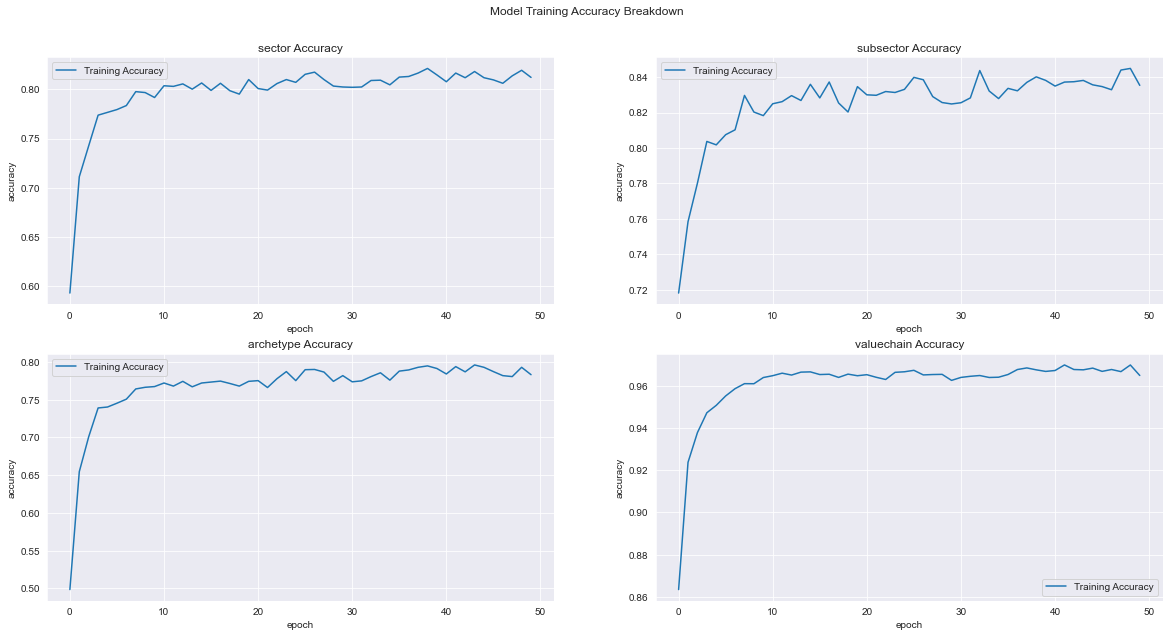

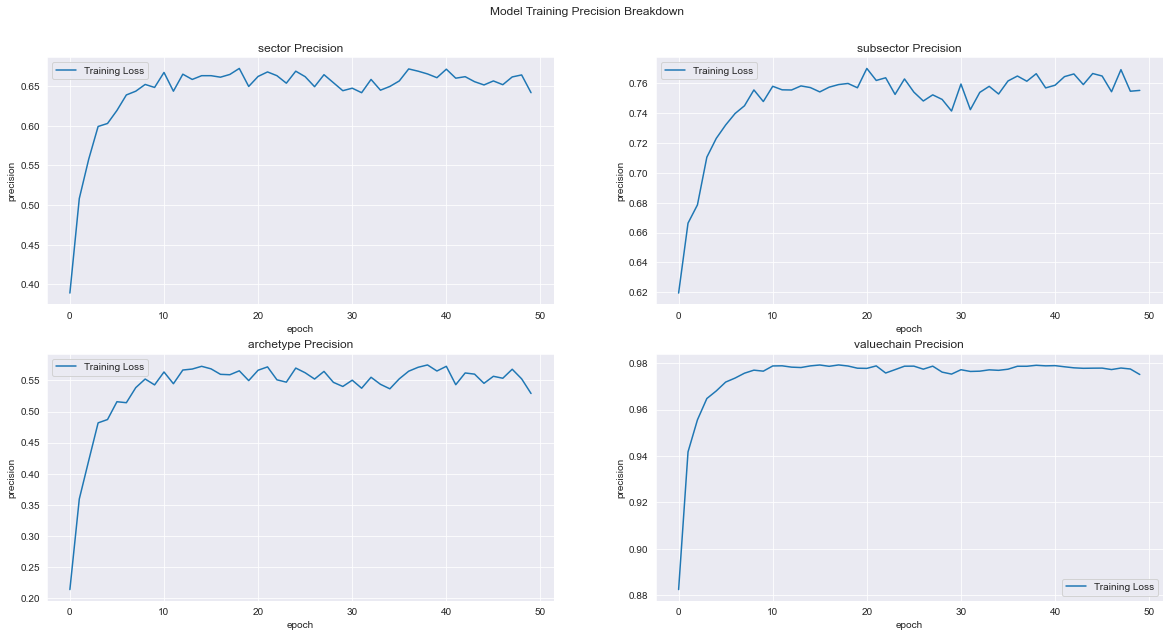

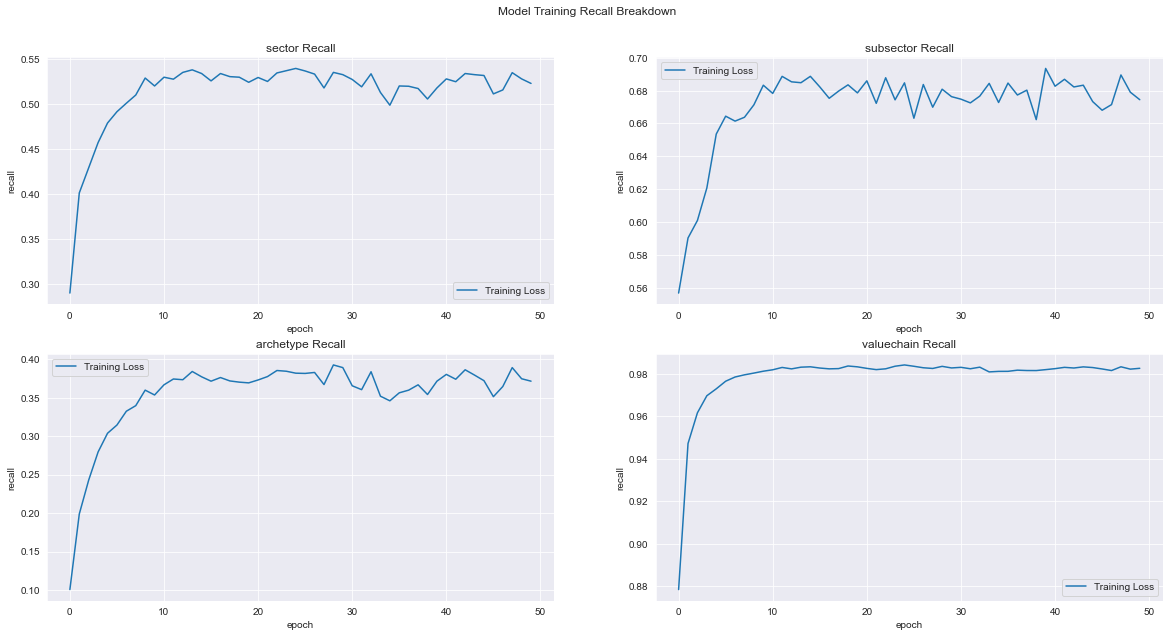

In [43]:
# plot metric graphs for all labels
metric_names = model.metrics_names

fig = plt.figure(1, figsize=(20,10))
plt.suptitle('Model Training Loss Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+1]])
    plt.title(f'{name} Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss'])

fig = plt.figure(2, figsize=(20,10))
plt.suptitle('Model Training Accuracy Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+5]])
    plt.title(f'{name} Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training Accuracy'])

fig = plt.figure(3, figsize=(20,10))
plt.suptitle('Model Training Precision Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+9]])
    plt.title(f'{name} Precision')
    plt.ylabel('precision')
    plt.xlabel('epoch')
    plt.legend(['Training Loss'])

fig = plt.figure(4, figsize=(20,10))
plt.suptitle('Model Training Recall Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+13]])
    plt.title(f'{name} Recall')
    plt.ylabel('recall')
    plt.xlabel('epoch')
    plt.legend(['Training Loss'])

plt.show()

In [ ]:
results = model.predict(X_test)

predicted_label = []
for label in results:
    predicted_label.append(np.argmax(label, axis = 1))
predicted_label = np.array(predicted_label)

for i in range(predicted_label.shape[1]):
    print(f'Expected: {y_test[i]} | got {predicted_label[:,i]}')

### 5.3. Saving Models

In [ ]:
# save models to file
model.save('./multilabel_model')

In [ ]:
!zip -r multilabel_model.zip ./multilabel_model

---
---
---

# 6.References


## Linking GitHub Private Repo with Google Colab
---
1. [How to clone private Github repo from Google Colab using SSH](https://medium.com/@purba0101/how-to-clone-private-github-repo-in-google-colab-using-ssh-77384cfef18f)
2. [Adding a new SSH key to your GitHub account](https://docs.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account)


## How to classify text with NLTK
---
1. [Learning to Classify Text](https://www.nltk.org/book/ch06.html)


## Other references
---
1. [Print very long string completely in pandas dataframe](https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
2. [Removing newlines from messy strings in pandas dataframe cells?
](https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells)
3. [Tokenizing using Pandas and spaCy](https://stackoverflow.com/questions/46981137/tokenizing-using-pandas-and-spacy)
4. [Intro to NLP with spaCy](https://nicschrading.com/project/Intro-to-NLP-with-spaCy/)
5. [A short introduction to NLP in Python with spaCy](https://towardsdatascience.com/a-short-introduction-to-nlp-in-python-with-spacy-d0aa819af3ad)
6. [Punctuation, stopwords and lemmatization with spacy](https://stackoverflow.com/questions/57747613/punctuation-stopwords-and-lemmatization-with-spacy)

